In [1]:
import pandas as pd
import panel as pn
import holoviews as hv
import numpy as np
import panel as pn
import torch
from masthay_helpers.jupyter import iplot

In [2]:
# Necessary setup from panel -- read docs if this confuses you.
pn.extension()

# Seed for reproducibility
np.random.seed(0)

# Setup the shape and populate random data
data_shape = (3, 50, 50, 30, 20)
random_data = torch.randn(*data_shape)
hv.extension('matplotlib', 'bokeh')
print(hv.Store.current_backend)

matplotlib


Row
    [0] Column
        [0] RadioBoxGroup(inline=True, name='Dimension', options=['1D', '2D'], value='1D')
        [1] Checkbox(name='Transpose?')
        [2] Checkbox(name='Invert Horizontal Axis?')
        [3] Checkbox(name='Invert Vertical Axis?')
        [4] Select(name='Colormap', options=['magma', 'inferno', ...], value='jet')
        [5] IntSlider(end=49, name='shot_no (IGNORE S...)
        [6] IntSlider(end=49, name='receiver_idx (...)
        [7] IntSlider(end=29, name='nonphysical_dummy')
        [8] IntSlider(end=19, name='time sample')
        [9] IntInput(end=3, name='Special Dimension 0', start=0)
        [10] IntInput(end=3, name='Special Dimension 1', start=0, value=1)
        [11] ParamFunction(function, _pane=Str, defer_load=False)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)
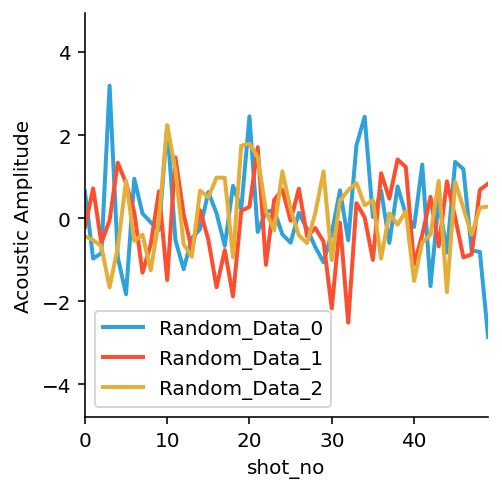

In [3]:
labels = [f'Random_Data_{i}' for i in range(data_shape[0])]
column_names = ['shot_no', 'receiver_idx', 'nonphysical_dummy', 'time sample']

layout = iplot(
    data=random_data,
    column_names=column_names,
    cols=2,
    one={
        'ylabel': "Acoustic Amplitude",
        'loop': {'labels': labels, 'xlabel': column_names},
        'ylim': (random_data.min().item(), random_data.max().item()),
    },
    two={
        'loop': {'colorbar': True, 'labels': labels},
        'aspect': 'square',
        'cmap': 'gray',
        'colorbar': True,
    },
)
layout.servable()